In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image
import pylab

# Add the path to the src folder to the python path
sys.path.append(os.path.abspath("../src"))
from optimizer import (
    FistaBT,
    FistaMod,
    FistaCD,
    GreedyFISTA,
    RestartingFISTA,
    OptimizationParams,
)

from problems import lasso_problem

import visualization as vis

In [30]:
dim = 2  # Dimension of the problem
mu = 5  # Regularization parameter
gamma = 0.0001  # Step size
x0 = np.random.randn(dim)  # Initial point

params = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=gamma,
    x0=x0,
    verbose=False,
)
print(x0)

[-0.8954802  -0.13295695]


In [31]:
lasso = lasso_problem(dim=dim)

# FISTA-BT


In [32]:
fista_bt = FistaBT(params)

In [33]:
x_bt, history_bt = fista_bt.optimize(*lasso)
print(f"Optimal point: {x_bt}")

 20%|██        | 1025/5000 [00:00<00:00, 66355.33it/s]

Optimal point: [-0.42122081 -0.24398537]


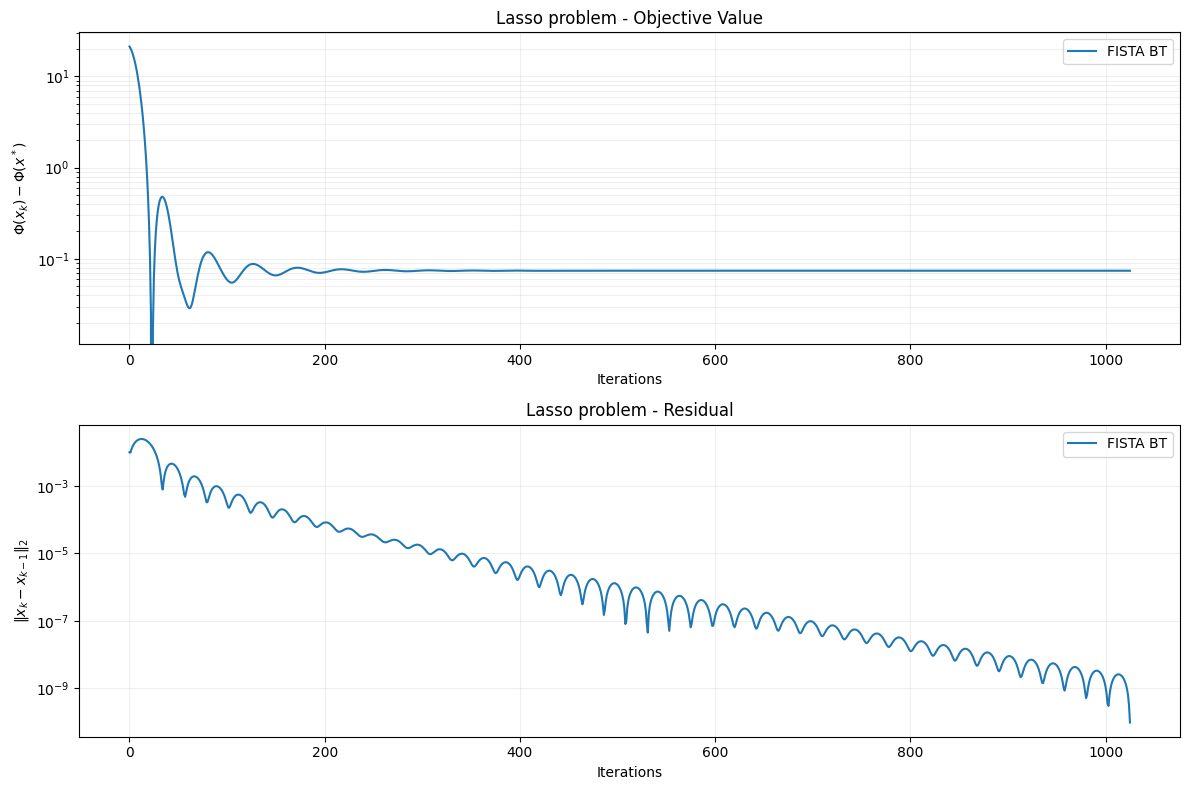

In [34]:
vis.plot_convergence([history_bt], labels=["FISTA BT"], title="Lasso problem")

# FISTA-Mod


In [35]:
fista_mod = FistaMod(params, p=1 / 20, q=1 / 2, r=4)

In [36]:
x_mod, history_mod = fista_mod.optimize(*lasso)

  5%|▍         | 234/5000 [00:00<00:00, 73036.70it/s]


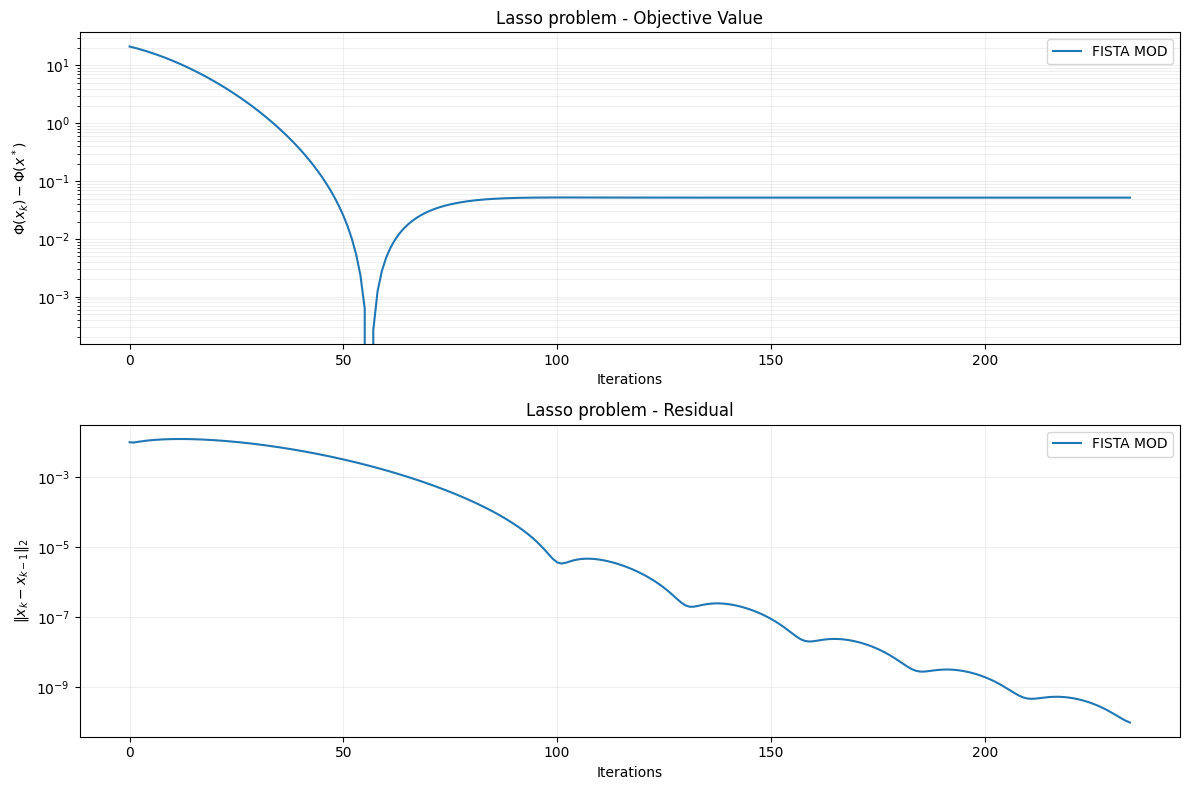

In [37]:
vis.plot_convergence([history_mod], labels=["FISTA MOD"], title="Lasso problem")

# Greedy FISTA


In [38]:
params_greedy = OptimizationParams(
    dim=dim,
    mu=mu,
    gamma=0.002,
    x0=x0,
    verbose=False,
)
fista_greedy = GreedyFISTA(params_greedy, S=1, xi=0.96)

In [39]:
x_greedy, history_greedy = fista_greedy.optimize(*lasso)

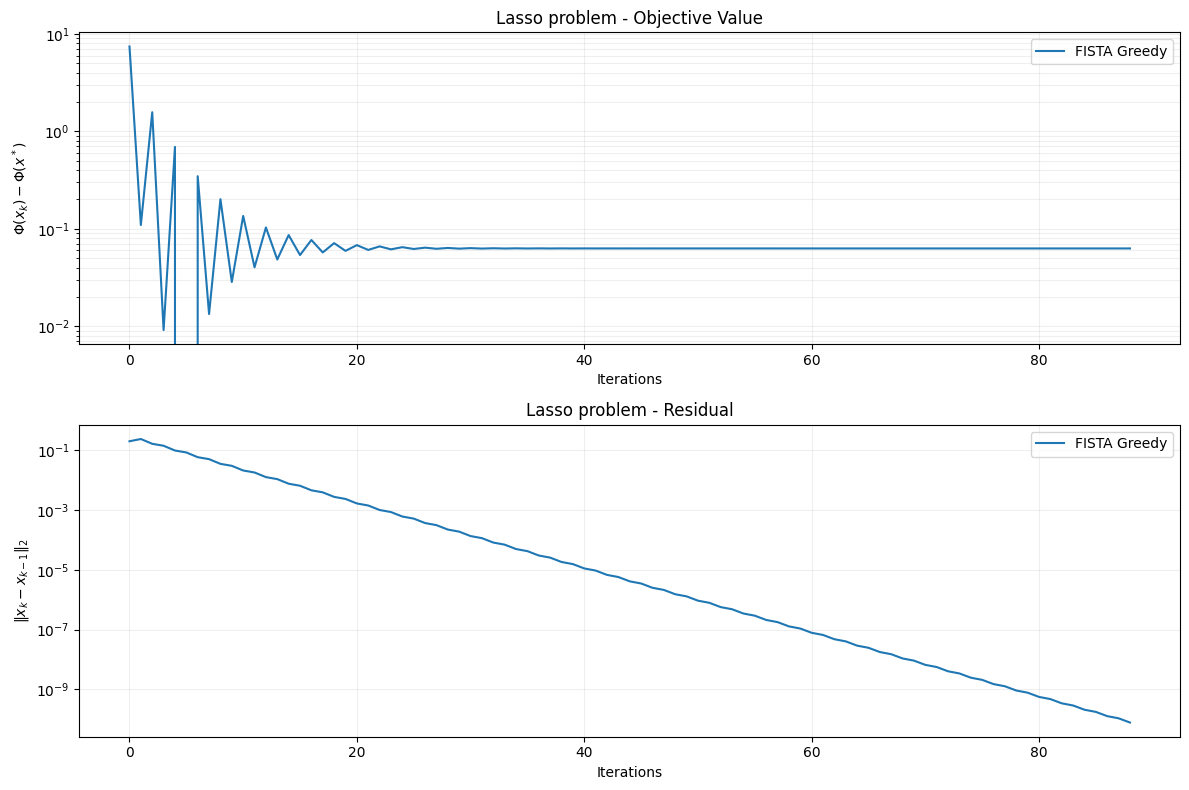

In [40]:
vis.plot_convergence([history_greedy], labels=["FISTA Greedy"], title="Lasso problem")

# Rada-FISTA


In [41]:
fista_rada = RestartingFISTA(params, p=1 / 20, q=1 / 2, r=4, xi=0.95)

In [42]:
x_rada, history_rada = fista_rada.optimize(*lasso)

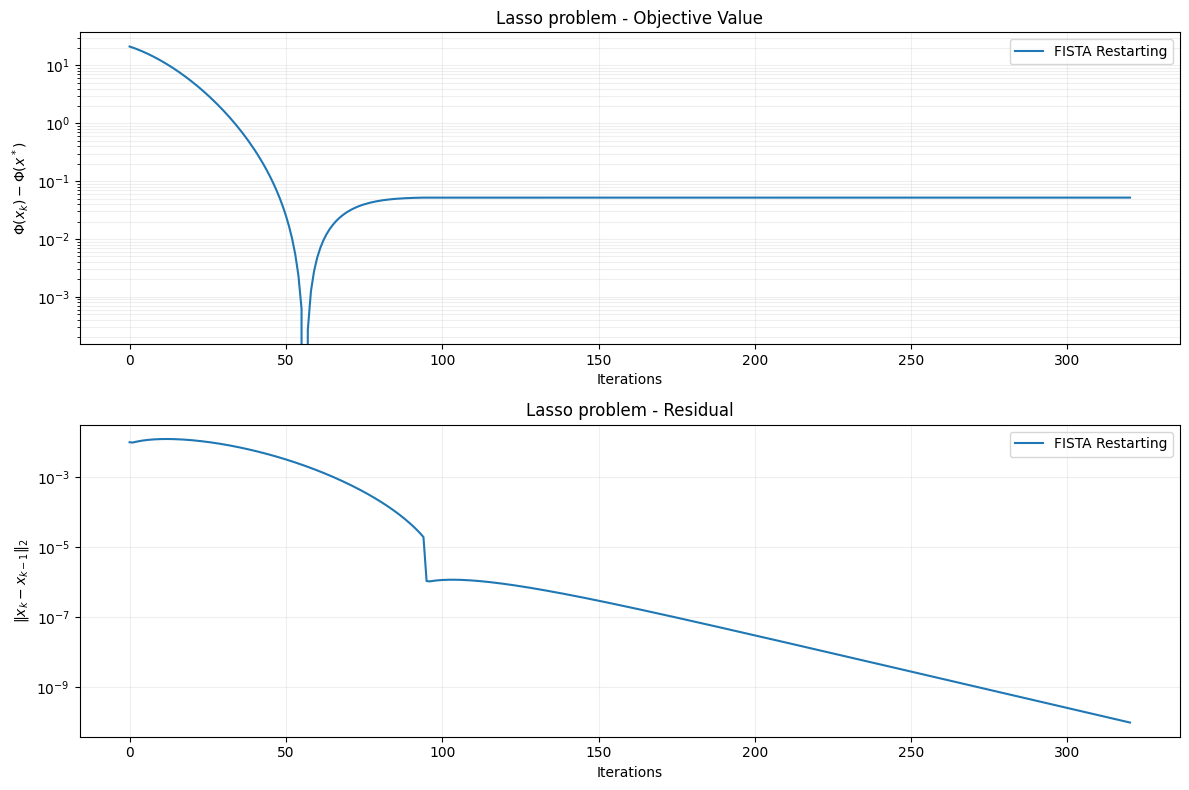

In [43]:
vis.plot_convergence([history_rada], labels=["FISTA Restarting"], title="Lasso problem")

# FISTA CD


In [44]:
fista_lazy = FistaCD(params, d=40)

In [45]:
x__lazy, history_lazy = fista_lazy.optimize(*lasso)

  0%|          | 0/5000 [00:00<?, ?it/s]

  5%|▍         | 230/5000 [00:00<00:00, 59896.31it/s]


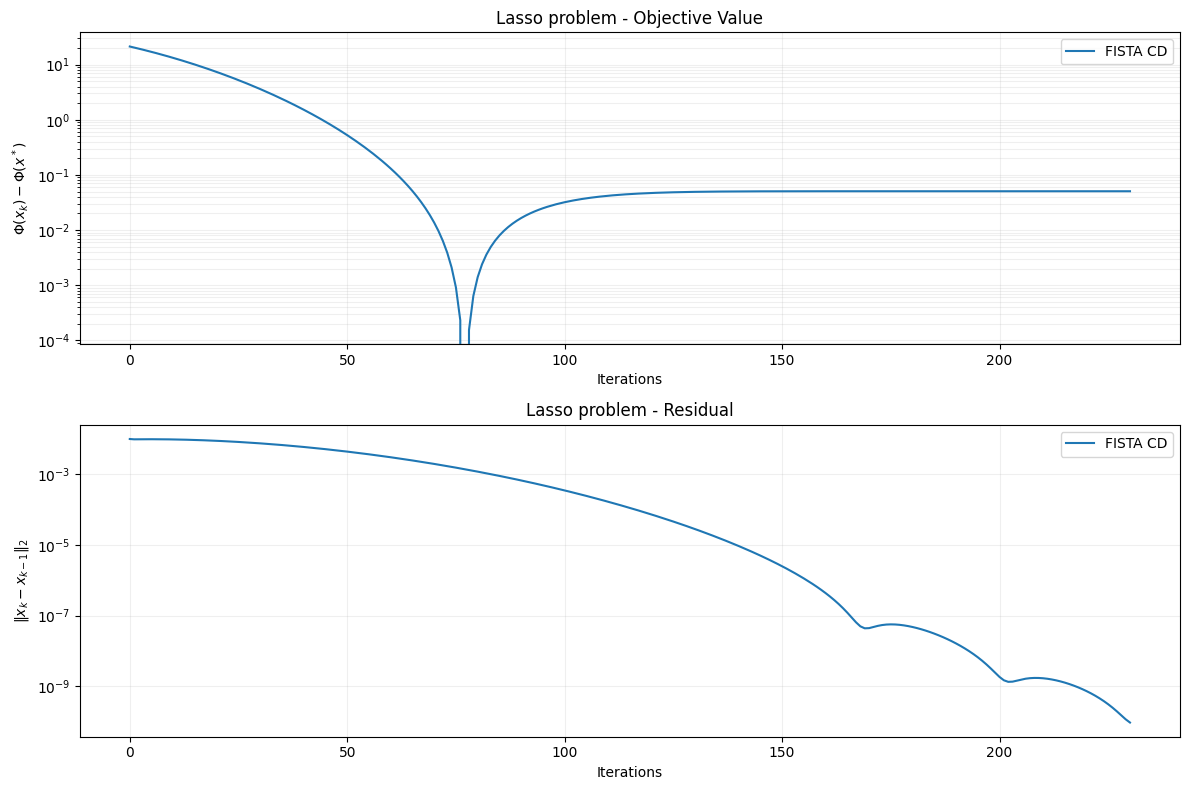

In [46]:
vis.plot_convergence([history_lazy], labels=["FISTA CD"], title="Lasso problem")

# Model comparison


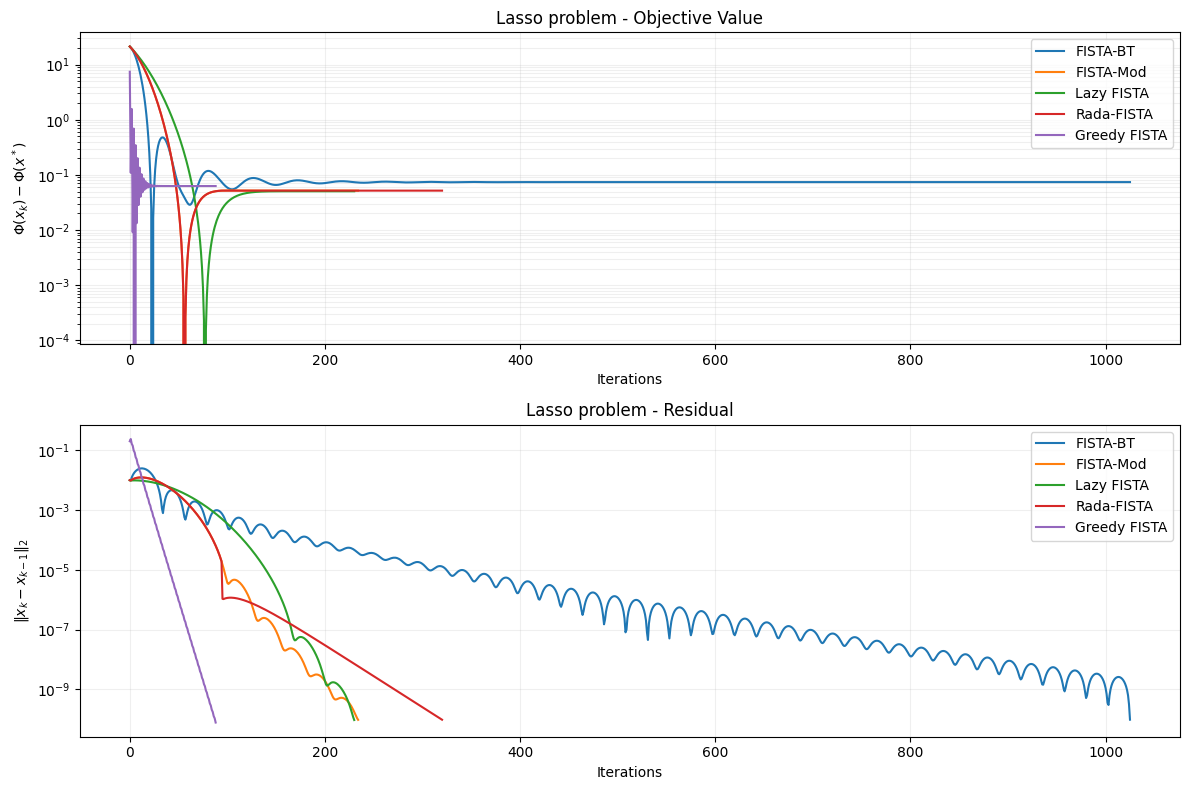

In [48]:
vis.plot_convergence(
    [history_bt, history_mod, history_lazy, history_rada, history_greedy],
    labels=["FISTA-BT", "FISTA-Mod", "Lazy FISTA", "Rada-FISTA", "Greedy FISTA"],
    title="Lasso problem",
)